# Market Basket Analysis 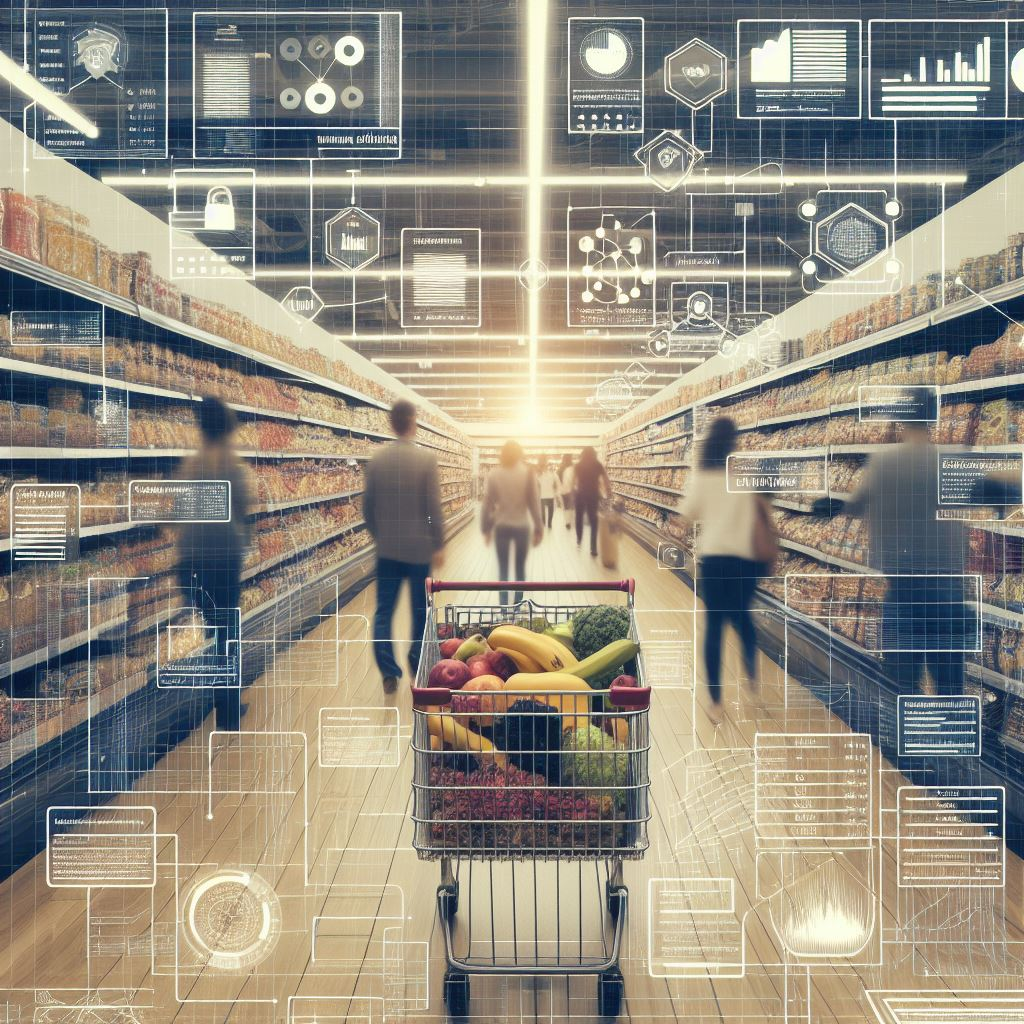



**Problem Statement:**

The objective is to analyze customer transaction data from a grocery store to uncover patterns of item co-occurrence and generate actionable insights for business optimization. This entails identifying frequent itemsets and association rules to facilitate strategic decision-making in product placement, marketing, and customer experience enhancement.


In [2]:
# Install the apyori package for market basket analysis
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=4418c061c3befc8210283a1be28d914fbe422e6deec52d25f77e61c19e4106bb
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [4]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computing
from apyori import apriori  # For performing market basket analysis
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")



In [5]:
path = "/content/drive/MyDrive/Datasets/Market_Basket_Optimisation.csv"
data=pd.read_csv(path)

In [ ]:
data.head() # Display first 5 rows

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info() # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [ ]:
data.isnull().sum() #checking for null values

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

#### Converting dataframe to list of lists

In [6]:
# Initialize an empty list to store transaction data
l = []

# Loop through each row (transaction) in the dataset
for i in range(data.shape[0]):
    # Initialize an empty list to store items in the current transaction
    transaction = []

    # Loop through each column (item) in the transaction
    for j in range(data.shape[1]):
        # Convert the item to a string and append it to the transaction list
        transaction.append(str(data.values[i, j]))

    # Append the transaction to the list of transactions
    l.append(transaction)


#### Applying Apriori Algorithm




In [8]:
# Import the apriori function from the apyori module
from apyori import apriori

# Generate association rules using Apriori algorithm with specified parameters
association_rules = apriori(l, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

# Convert association rules to a list for easier manipulation
association_results = list(association_rules)


In [9]:
# Calculate the number of association rules
num_association_rules = len(association_results)

# Print the number of association rules
print("Number of association rules:", num_association_rules)


Number of association rules: 48


In [10]:
# Iterate through each association rule and print its details
for i, rule in enumerate(association_results, start=1):
    print(f"Association Rule {i}:")
    print(f"  - Items: {', '.join(list(rule.items))}")
    print(f"  - Support: {rule.support}")
    print(f"  - Confidence: {rule.ordered_statistics[0].confidence}")
    print(f"  - Lift: {rule.ordered_statistics[0].lift}")
    print()


Association Rule 1:
  - Items: chicken, light cream
  - Support: 0.004533333333333334
  - Confidence: 0.2905982905982906
  - Lift: 4.843304843304844

Association Rule 2:
  - Items: mushroom cream sauce, escalope
  - Support: 0.005733333333333333
  - Confidence: 0.30069930069930073
  - Lift: 3.7903273197390845

Association Rule 3:
  - Items: pasta, escalope
  - Support: 0.005866666666666667
  - Confidence: 0.37288135593220345
  - Lift: 4.700185158809287

Association Rule 4:
  - Items: ground beef, herb & pepper
  - Support: 0.016
  - Confidence: 0.3234501347708895
  - Lift: 3.2915549671393096

Association Rule 5:
  - Items: ground beef, tomato sauce
  - Support: 0.005333333333333333
  - Confidence: 0.37735849056603776
  - Lift: 3.840147461662528

Association Rule 6:
  - Items: olive oil, whole wheat pasta
  - Support: 0.008
  - Confidence: 0.2714932126696833
  - Lift: 4.130221288078346

Association Rule 7:
  - Items: pasta, shrimp
  - Support: 0.005066666666666666
  - Confidence: 0.3220

In [12]:
# Initialize an empty list to store the dictionary representations of the association rules
association_rules_dict = []

# Iterate through the association rules
for record in association_results:
    items = list(record.items)

    ordered_statistics = []
    support = record.support

    # Iterate through the ordered statistics of each association rule
    for stat in record.ordered_statistics:
        items_base = list(stat.items_base)
        items_add = list(stat.items_add)
        confidence = stat.confidence
        lift = stat.lift

        # Create a dictionary for each ordered statistic
        stat_dict = {
            "items_base": items_base,
            "items_add": items_add,
            "confidence": confidence,
            "lift": lift
        }
        # Append the ordered statistic dictionary to the list
        ordered_statistics.append(stat_dict)

    # Create a dictionary representation of the association rule
    rule_dict = {
        "items": items,
        "support": support,
        "ordered_statistics": ordered_statistics
    }
    # Append the rule dictionary to the list of association rules
    association_rules_dict.append(rule_dict)

# Print the association rules in a clear, human-readable format
for i, rule_dict in enumerate(association_rules_dict, start=1):
    print(f"Association Rule {i}:")
    print(f"  Items: {', '.join(map(str, rule_dict['items']))}")
    print(f"  Support: {rule_dict['support']}")

    # Print each ordered statistic
    for j, stat_dict in enumerate(rule_dict['ordered_statistics'], start=1):
        print(f"  Ordered Statistic {j}:")
        print(f"    Base Items: {', '.join(map(str, stat_dict['items_base']))}")
        print(f"    Add Items: {', '.join(map(str, stat_dict['items_add']))}")
        print(f"    Confidence: {stat_dict['confidence']}")
        print(f"    Lift: {stat_dict['lift']}")

    print()


Association Rule 1:
  Items: chicken, light cream
  Support: 0.004533333333333334
  Ordered Statistic 1:
    Base Items: light cream
    Add Items: chicken
    Confidence: 0.2905982905982906
    Lift: 4.843304843304844

Association Rule 2:
  Items: mushroom cream sauce, escalope
  Support: 0.005733333333333333
  Ordered Statistic 1:
    Base Items: mushroom cream sauce
    Add Items: escalope
    Confidence: 0.30069930069930073
    Lift: 3.7903273197390845

Association Rule 3:
  Items: pasta, escalope
  Support: 0.005866666666666667
  Ordered Statistic 1:
    Base Items: pasta
    Add Items: escalope
    Confidence: 0.37288135593220345
    Lift: 4.700185158809287

Association Rule 4:
  Items: ground beef, herb & pepper
  Support: 0.016
  Ordered Statistic 1:
    Base Items: herb & pepper
    Add Items: ground beef
    Confidence: 0.3234501347708895
    Lift: 3.2915549671393096

Association Rule 5:
  Items: ground beef, tomato sauce
  Support: 0.005333333333333333
  Ordered Statistic 1:

In [14]:
# Initialize an empty DataFrame with specified column names
df = pd.DataFrame(columns=["items", "support", "ordered_statistics"])

# Iterate through list of dictionaries containing association rule details
for rule in association_rules_dict:
    items = rule["items"]
    support = rule["support"]
    ordered_statistics = rule["ordered_statistics"]

    # Append a new row to the DataFrame with association rule details
    df = df.append({"items": items, "support": support, "ordered_statistics": ordered_statistics}, ignore_index=True)

# Display the DataFrame
df


,items,support,ordered_statistics
0,"[chicken, light cream]",0.004533,"[{'items_base': ['light cream'], 'items_add': ..."
1,"[mushroom cream sauce, escalope]",0.005733,"[{'items_base': ['mushroom cream sauce'], 'ite..."
2,"[pasta, escalope]",0.005867,"[{'items_base': ['pasta'], 'items_add': ['esca..."
3,"[ground beef, herb & pepper]",0.016000,"[{'items_base': ['herb & pepper'], 'items_add'..."
4,"[ground beef, tomato sauce]",0.005333,"[{'items_base': ['tomato sauce'], 'items_add':..."
5,"[olive oil, whole wheat pasta]",0.008000,"[{'items_base': ['whole wheat pasta'], 'items_..."
6,"[pasta, shrimp]",0.005067,"[{'items_base': ['pasta'], 'items_add': ['shri..."
7,"[chicken, light cream, nan]",0.004533,"[{'items_base': ['light cream'], 'items_add': ..."
8,"[frozen vegetables, chocolate, shrimp]",0.005333,"[{'items_base': ['frozen vegetables', 'chocola..."
9,"[ground beef, cooking oil, spaghetti]",0.004800,"[{'items_base': ['ground beef', 'cooking oil']..."


Through market basket analysis, we identified significant associations between items in customer transactions, providing valuable insights for optimizing product placement and marketing strategies in retail.